In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ast
import warnings
import os
import sys
# Suppress warnings
warnings.filterwarnings('ignore')
sys.stderr = open(os.devnull, 'w') 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [2]:
df1 = pd.read_csv("/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv")
df2 = pd.read_csv("/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv")

In [3]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
df1.columns = ['id', 'tittle', 'class', 'crew']
df = df2.merge(df1, on = 'id')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,class,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
columns = ["id", "budget", "genres", "title",	"popularity", "runtime", "vote_average", "vote_count"]
df = df[columns]

In [7]:
df.describe()

,id,budget,popularity,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4801.000000,4803.000000,4803.000000
mean,57165.484281,2.904504e+07,21.492301,106.875859,6.092172,690.217989
std,88694.614033,4.072239e+07,31.816650,22.611935,1.194612,1234.585891
min,5.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,9014.500000,7.900000e+05,4.668070,94.000000,5.600000,54.000000
50%,14629.000000,1.500000e+07,12.921594,103.000000,6.200000,235.000000
75%,58610.500000,4.000000e+07,28.313505,118.000000,6.800000,737.000000
max,459488.000000,3.800000e+08,875.581305,338.000000,10.000000,13752.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4803 non-null   int64  
 1   budget        4803 non-null   int64  
 2   genres        4803 non-null   object 
 3   title         4803 non-null   object 
 4   popularity    4803 non-null   float64
 5   runtime       4801 non-null   float64
 6   vote_average  4803 non-null   float64
 7   vote_count    4803 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 300.3+ KB


In [9]:
df[df.isna().any(axis=1)]

,id,budget,genres,title,popularity,runtime,vote_average,vote_count
2656,370980,15000000,"[{""id"": 18, ""name"": ""Drama""}]",Chiamatemi Francesco - Il Papa della gente,0.738646,NaN,7.3,12
4140,459488,2,"[{""id"": 99, ""name"": ""Documentary""}]","To Be Frank, Sinatra at 100",0.050625,NaN,0.0,0


In [10]:
df.dropna(inplace=True)

In [11]:
def weighted_rating():
  m = df['vote_count'].quantile(0.8)
  v = df["vote_count"]
  R = df["vote_average"]
  C = df["vote_average"].mean()
  return (v/(v+m) * R) + (m/(m+v) * C)

In [12]:
df["weighted_rating"] = weighted_rating()
df.sort_values("weighted_rating", ascending=False).head(20)

,id,budget,genres,title,popularity,runtime,vote_average,vote_count,weighted_rating
1881,278,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",The Shawshank Redemption,136.747729,142.0,8.5,8205,8.248366
662,550,63000000,"[{""id"": 18, ""name"": ""Drama""}]",Fight Club,146.757391,139.0,8.3,9413,8.096150
3337,238,6000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",The Godfather,143.659698,175.0,8.4,5893,8.077430
3232,680,8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",Pulp Fiction,121.463076,154.0,8.3,8428,8.074758
65,155,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",The Dark Knight,187.322927,152.0,8.2,12002,8.044265
809,13,55000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",Forrest Gump,138.133331,142.0,8.2,7927,7.972839
96,27205,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",Inception,167.583710,148.0,8.1,13752,7.969305
95,157336,165000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 18, ""...",Interstellar,724.247784,169.0,8.1,10867,7.937419
1990,1891,18000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",The Empire Strikes Back,78.517830,124.0,8.2,5879,7.904794
1818,424,22000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",Schindler's List,104.469351,195.0,8.3,4329,7.900128


In [13]:
def process_genre(genre_data):
  genre_list = ast.literal_eval(genre_data)
  return [d["name"] for d in genre_list]

df["genres"] = df["genres"].apply(process_genre)
df.head()

,id,budget,genres,title,popularity,runtime,vote_average,vote_count,weighted_rating
0,19995,237000000,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,150.437577,162.0,7.2,11800,7.116889
1,285,300000000,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,139.082615,169.0,6.9,4500,6.758387
2,206647,245000000,"[Action, Adventure, Crime]",Spectre,107.376788,148.0,6.3,4466,6.263473
3,49026,250000000,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,112.312950,165.0,7.6,9106,7.456565
4,49529,260000000,"[Action, Adventure, Science Fiction]",John Carter,43.926995,132.0,6.1,2124,6.097883


In [14]:
df["rating_class"] = df["weighted_rating"].apply(lambda x: "High" if x > 8 else ("Average" if x < 8 and x > 6 else "Low"))

In [15]:
df.groupby("rating_class").head(5).sort_values("weighted_rating")

,id,budget,genres,title,popularity,runtime,vote_average,vote_count,weighted_rating,rating_class
10,1452,270000000,"[Adventure, Fantasy, Action, Science Fiction]",Superman Returns,57.925623,154.0,5.4,1400,5.681626,Low
9,209112,250000000,"[Action, Adventure, Fantasy]",Batman v Superman: Dawn of Justice,155.790452,151.0,5.7,7004,5.747309,Low
23,2268,180000000,"[Adventure, Fantasy]",The Golden Compass,42.990906,113.0,5.8,1303,5.924226,Low
5,559,258000000,"[Fantasy, Action, Adventure]",Spider-Man 3,115.699814,139.0,5.9,3576,5.940819,Low
13,57201,255000000,"[Action, Adventure, Western]",The Lone Ranger,49.046956,149.0,5.9,2311,5.956615,Low
4,49529,260000000,"[Action, Adventure, Science Fiction]",John Carter,43.926995,132.0,6.1,2124,6.097883,Average
2,206647,245000000,"[Action, Adventure, Crime]",Spectre,107.376788,148.0,6.3,4466,6.263473,Average
1,285,300000000,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,139.082615,169.0,6.9,4500,6.758387,Average
0,19995,237000000,"[Action, Adventure, Fantasy, Science Fiction]",Avatar,150.437577,162.0,7.2,11800,7.116889,Average
3,49026,250000000,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,112.312950,165.0,7.6,9106,7.456565,Average


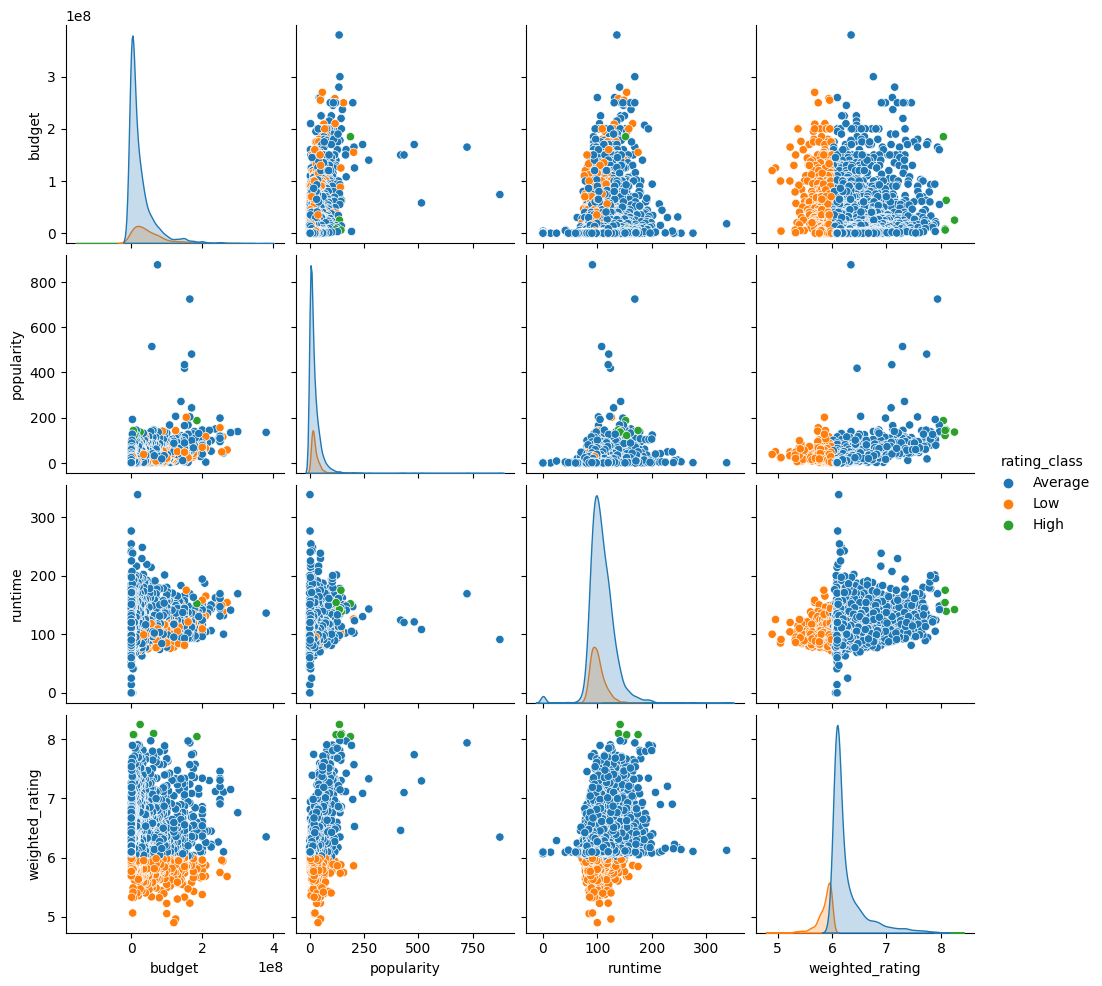

In [16]:
sns.pairplot(df[["budget", "popularity", "runtime", "weighted_rating","rating_class"]], hue="rating_class")
plt.show()

In [17]:
genre_list = []
popularity_list = []
weighted_rating_list = []

for idx, row in df.iterrows():
    for genre in row['genres']:
        genre_list.append(genre)
        popularity_list.append(row['popularity'])
        weighted_rating_list.append(row['weighted_rating'])

genre_df = pd.DataFrame({
    "genres": genre_list,
    "popularity": popularity_list,
    "weighted_rating": weighted_rating_list
})

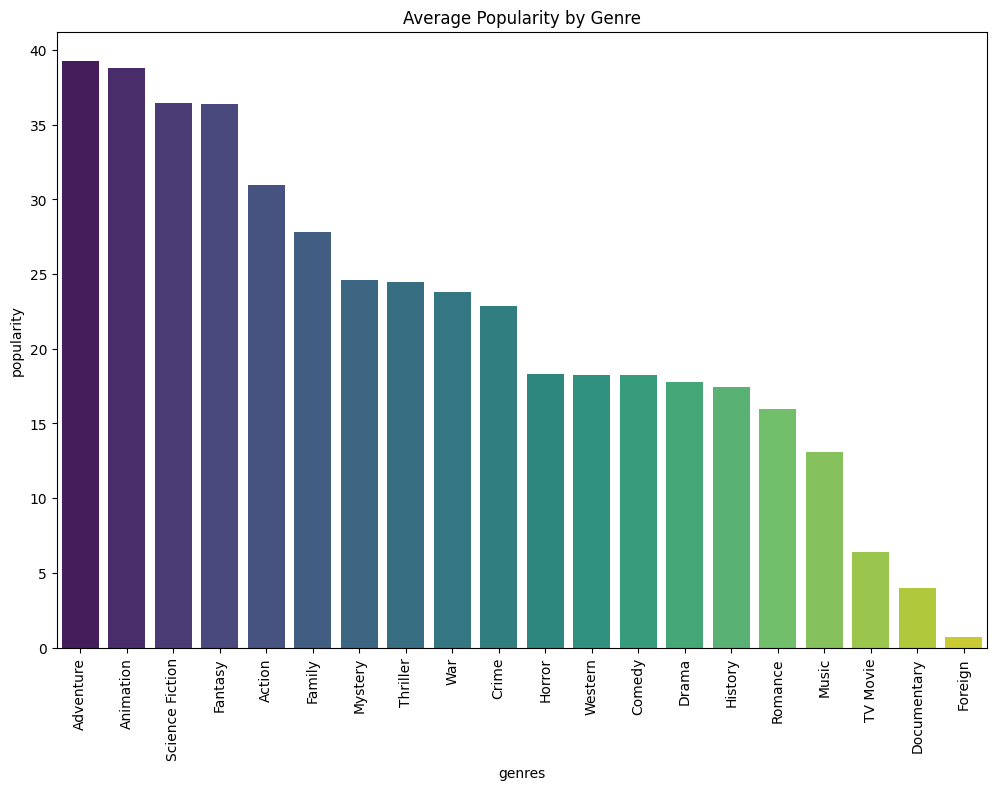

In [18]:
avg_ratings = genre_df.groupby('genres')['popularity'].mean().reset_index()

avg_ratings = avg_ratings.sort_values(by='popularity', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='genres', y='popularity', data=avg_ratings, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Popularity by Genre')
plt.show()

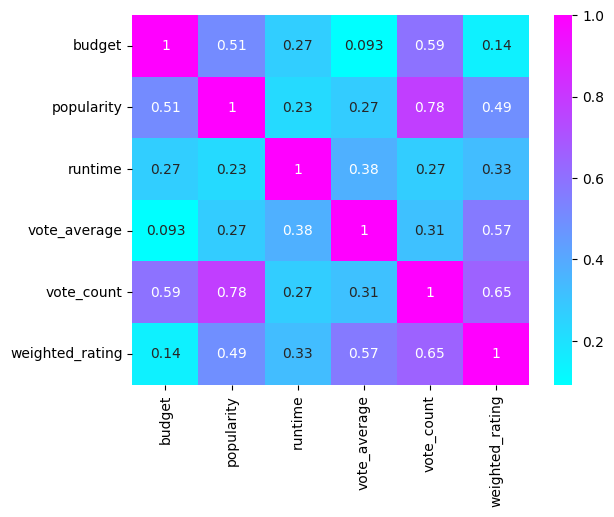

In [19]:
sns.heatmap(df[["budget", "popularity", "runtime", "vote_average", "vote_count", "weighted_rating"]].corr(), annot=True, cmap = "cool")
plt.show()

In [20]:
df_ref = df[["id", "title"]]
df_ref.head()

,id,title
0,19995,Avatar
1,285,Pirates of the Caribbean: At World's End
2,206647,Spectre
3,49026,The Dark Knight Rises
4,49529,John Carter


In [21]:
df.drop(['id', 'title'], axis=1, inplace=True)

In [22]:
df

,budget,genres,popularity,runtime,vote_average,vote_count,weighted_rating,rating_class
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",150.437577,162.0,7.2,11800,7.116889,Average
1,300000000,"[Adventure, Fantasy, Action]",139.082615,169.0,6.9,4500,6.758387,Average
2,245000000,"[Action, Adventure, Crime]",107.376788,148.0,6.3,4466,6.263473,Average
3,250000000,"[Action, Crime, Drama, Thriller]",112.312950,165.0,7.6,9106,7.456565,Average
4,260000000,"[Action, Adventure, Science Fiction]",43.926995,132.0,6.1,2124,6.097883,Average
...,...,...,...,...,...,...,...,...
4798,220000,"[Action, Crime, Thriller]",14.269792,81.0,6.6,238,6.194043,Average
4799,9000,"[Comedy, Romance]",0.642552,85.0,5.9,5,6.092186,Average
4800,0,"[Comedy, Drama, Romance, TV Movie]",1.444476,120.0,7.0,6,6.098833,Average
4801,0,[],0.857008,98.0,5.7,7,6.090337,Average


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [24]:
categorical_columns = ["rating_class"]
multilabel_columns = ["genres"]
numerical_columns = ["budget", "popularity", "runtime", "vote_average", "vote_count", "weighted_rating"]

# Log scaling for numerical columns
def apply_log_scaling(df, columns):
    df_log_scaled = df.copy()
    for col in columns:
        # Apply log transformation with a small constant to avoid log(0) issues
        df_log_scaled[col] = np.log1p(df[col])
    return df_log_scaled

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)
multilabel_transformer = MultiLabelBinarizer()

df_numerical = df[numerical_columns]
df_numerical_log_scaled = apply_log_scaling(df_numerical, numerical_columns)

df_numerical_scaled = numerical_transformer.fit_transform(df_numerical_log_scaled)

df_categorical = df[categorical_columns]
df_categorical_encoded = categorical_transformer.fit_transform(df_categorical)

df_multilabel = df[multilabel_columns]
df_multilabel_encoded = multilabel_transformer.fit_transform(df_multilabel)
df_multilabel_df = pd.DataFrame(df_multilabel_encoded, columns=multilabel_transformer.classes_)

df_preprocessed = pd.concat([
    pd.DataFrame(df_numerical_scaled, columns=numerical_columns),
    pd.DataFrame(df_categorical_encoded, columns=categorical_transformer.get_feature_names_out(categorical_columns)),
    df_multilabel_df
], axis=1)

# Check for any NaNs introduced by transformation
print(df_preprocessed.isna().sum())
print(df_preprocessed[df_preprocessed.isna().any(axis=1)])

budget                  0
popularity              0
runtime                 0
vote_average            0
vote_count              0
weighted_rating         0
rating_class_High       0
rating_class_Low        0
e                    4800
g                    4800
n                    4800
r                    4800
s                    4800
dtype: int64
        budget  popularity   runtime  vote_average  vote_count  \
1     0.925625    2.089320  1.144405      0.496260    1.675951   
2     0.896854    1.868174  0.841344      0.199735    1.671964   
3     0.899724    1.906557  1.089676      0.814976    2.046500   
4     0.905296    1.109324  0.580241      0.095449    1.281329   
5     0.904199    1.931937  0.698138     -0.011816    1.555137   
...        ...         ...       ...           ...         ...   
4796 -0.099752    0.179337 -0.531379      0.350924    0.132438   
4797 -0.553819   -1.742081 -0.421907     -0.011816   -1.804953   
4798 -1.847290   -1.399460  0.362899      0.543481   -1

In [25]:
df_preprocessed.fillna(0.0, inplace=True)

In [26]:
df_preprocessed

,budget,popularity,runtime,vote_average,vote_count,weighted_rating,rating_class_High,rating_class_Low,e,g,n,r,s
0,0.892138,2.156487,1.047757,0.636178,2.182754,2.626926,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,0.925625,2.089320,1.144405,0.496260,1.675951,1.640391,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.896854,1.868174,0.841344,0.199735,1.671964,0.200827,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.899724,1.906557,1.089676,0.814976,2.046500,3.522250,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.905296,1.109324,0.580241,0.095449,1.281329,-0.302818,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,-0.099752,0.179337,-0.531379,0.350924,0.132438,-0.008934,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4797,-0.553819,-1.742081,-0.421907,-0.011816,-1.804953,-0.320354,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4798,-1.847290,-1.399460,0.362899,0.543481,-1.723901,-0.299895,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4799,-1.847290,-1.636329,-0.098342,-0.122237,-1.653691,-0.326049,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
import time
!pip install kneed
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from joblib import Parallel, delayed
import itertools
from sklearn.model_selection import ParameterGrid

In [35]:
unsupervised_param_grids = {
    "kmeans": {
        "n_clusters": list(range(2, 11)),
        "init": ['k-means++', 'random'],
        "n_init": ['auto', 10, 30],
        "algorithm": ['auto', 'elkan'],
        "max_iter": [300, 500],
        "tol": [1e-4, 1e-3]
    },
    "dbscan": {
        "eps": np.logspace(-1, 1, 5),
        "min_samples": range(2, 10),
        "metric": ['euclidean', 'manhattan'],
        "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
        "leaf_size": [10, 20],
    },
    "hierarchicalclustering": {
        "n_clusters": list(range(2, 11)),
        "metric": ["euclidean", "manhattan", "cosine"],
        "linkage": ["ward", "complete", "average", "single"],
        "distance_threshold": [None, 1.0, 2.0],
        "compute_full_tree": [True, False],
    },
    "pca": {
        "n_components": [1, 2, 3],
        "svd_solver": ['auto', 'full', 'arpack', 'randomized'],
        "whiten": [True, False],
    }
}

db_hierarchial_models = {
    "DBSCAN": DBSCAN(),
    "HierarchicalClustering": AgglomerativeClustering()
}

In [29]:
def plot_clusters(df, labels, title, colors='viridis'):
    plt.figure(figsize=(10, 8))

    if df.shape[1] == 1:
        plt.scatter(range(len(df)), df[:, 0], c=labels, cmap=colors, edgecolor='k', s=70)
        plt.xlabel("Index")
        plt.ylabel("Component 1")
    else:
        plt.scatter(df[:, 0], df[:, 1], c=labels, cmap=colors, edgecolor='k', s=70)
        plt.xlabel("Component 1")
        plt.ylabel("Component 2")

    plt.title(title, fontsize=16, fontweight='bold')
    plt.colorbar(label='Cluster Label')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

Finding optimal parameters...
Evaluating optimal clusters without PCA...


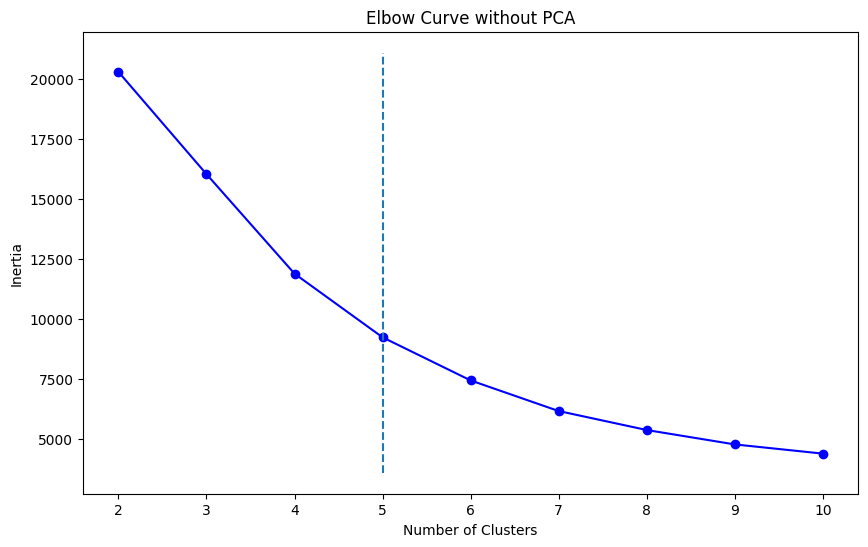

Optimal number of clusters without PCA: 5

Evaluating optimal PCA parameters and clusters...
PCA components: 1, Optimal clusters: 5, Score: 4095.9881, SVD Solver: randomized, Whiten: False
PCA components: 2, Optimal clusters: 4, Score: 1622.3920, SVD Solver: randomized, Whiten: False
PCA components: 3, Optimal clusters: 4, Score: 1276.5422, SVD Solver: randomized, Whiten: False


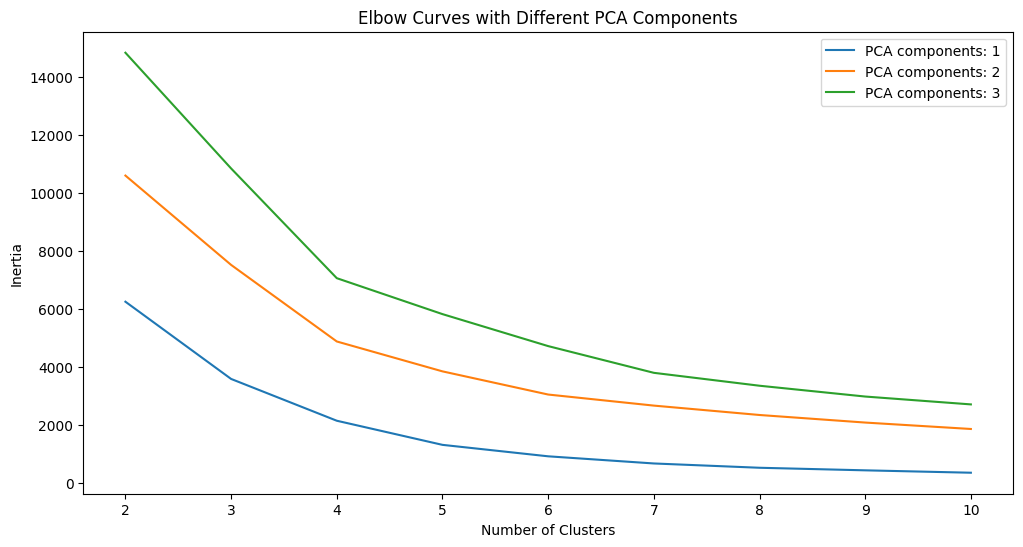

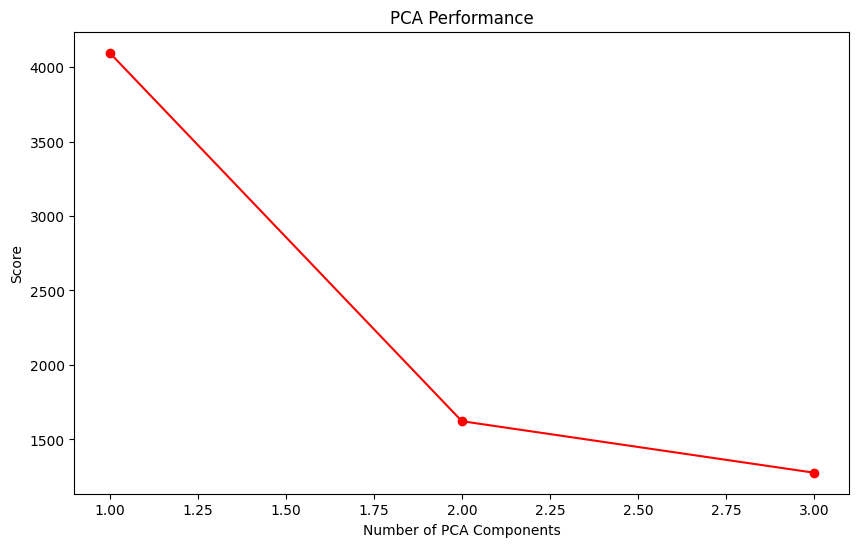


Best PCA parameters:
Number of components: 1
Optimal number of clusters: 5
Score: 4095.9881


In [30]:

def find_optimal_parameters(df, kmeans_params, pca_params, random_state=42, n_jobs=-1):
    print("Finding optimal parameters...")
    df_np = df.to_numpy()

    def compute_inertia(k, data):
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(data)
        return kmeans.inertia_

    # Without PCA
    print("Evaluating optimal clusters without PCA...")
    inertias_no_pca = Parallel(n_jobs=n_jobs)(
        delayed(compute_inertia)(k, df_np) for k in kmeans_params['n_clusters']
    )
    knee_no_pca = KneeLocator(kmeans_params['n_clusters'], inertias_no_pca, curve='convex', direction='decreasing')
    optimal_clusters_no_pca = knee_no_pca.elbow

    # Visualize elbow curve without PCA
    plt.figure(figsize=(10, 6))
    plt.plot(kmeans_params['n_clusters'], inertias_no_pca, 'bo-')
    plt.vlines(optimal_clusters_no_pca, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Curve without PCA')
    plt.show()

    print(f"Optimal number of clusters without PCA: {optimal_clusters_no_pca}")

    # With PCA
    print("\nEvaluating optimal PCA parameters and clusters...")
    best_pca_params = {'n_components': None, 'n_clusters': None, 'score': -np.inf, 'svd_solver': None, 'whiten': None}

    pca_results = []

    for n_components in pca_params['n_components']:
        for svd_solver in pca_params['svd_solver']:
            for whiten in pca_params['whiten']:
                pca = PCA(n_components=n_components, svd_solver=svd_solver, whiten=whiten, random_state=random_state)
                df_pca = pca.fit_transform(df_np)

                inertias_pca = Parallel(n_jobs=n_jobs)(
                    delayed(compute_inertia)(k, df_pca) for k in kmeans_params['n_clusters']
                )
                knee_pca = KneeLocator(kmeans_params['n_clusters'], inertias_pca, curve='convex', direction='decreasing')
                optimal_clusters_pca = knee_pca.elbow

        # Evaluate the PCA + KMeans combination
        kmeans = KMeans(n_clusters=optimal_clusters_pca, random_state=random_state)
        labels = kmeans.fit_predict(df_pca)
        silhouette = silhouette_score(df_pca, labels)
        davies_bouldin = davies_bouldin_score(df_pca, labels)
        calinski_harabasz = calinski_harabasz_score(df_pca, labels)
        score = (silhouette - davies_bouldin + calinski_harabasz) / 3

        pca_results.append({
            'n_components': n_components,
            'optimal_clusters': optimal_clusters_pca,
            'score': score,
            'inertias': inertias_pca,
            'svd_solver': svd_solver,
            'whiten': whiten
        })

        print(f"PCA components: {n_components}, Optimal clusters: {optimal_clusters_pca}, Score: {score:.4f}, SVD Solver: {svd_solver}, Whiten: {whiten}")

        if score > best_pca_params['score']:
            best_pca_params = {
                'n_components': n_components,
                'n_clusters': optimal_clusters_pca,
                'score': score,
                'svd_solver': svd_solver,
                'whiten': whiten
            }

    # Visualize PCA results
    plt.figure(figsize=(12, 6))
    for result in pca_results:
        plt.plot(kmeans_params['n_clusters'], result['inertias'],
                 label=f"PCA components: {result['n_components']}")
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Curves with Different PCA Components')
    plt.legend()
    plt.show()

    # Visualize PCA performance
    plt.figure(figsize=(10, 6))
    plt.plot([r['n_components'] for r in pca_results], [r['score'] for r in pca_results], 'ro-')
    plt.xlabel('Number of PCA Components')
    plt.ylabel('Score')
    plt.title('PCA Performance')
    plt.show()

    print(f"\nBest PCA parameters:")
    print(f"Number of components: {best_pca_params['n_components']}")
    print(f"Optimal number of clusters: {best_pca_params['n_clusters']}")
    print(f"Score: {best_pca_params['score']:.4f}")

    return optimal_clusters_no_pca, best_pca_params

# Usage
optimal_clusters_no_pca, best_pca_params = find_optimal_parameters(
    df_preprocessed,
    unsupervised_param_grids["kmeans"],
    unsupervised_param_grids["pca"],
    n_jobs=-1
)


Running KMeans with optimal parameters...
Evaluating KMeans without PCA...
Best KMeans without PCA - Score: 876.2686
Best Parameters for KMeans without PCA: {'algorithm': 'auto', 'init': 'k-means++', 'max_iter': 300, 'n_clusters': 5, 'n_init': 10, 'tol': 0.0001}
Evaluating KMeans with PCA...
Best KMeans with PCA - Score: 4096.0915
Best Parameters for KMeans with PCA: {'algorithm': 'auto', 'init': 'random', 'max_iter': 300, 'n_clusters': 5, 'n_init': 'auto', 'tol': 0.0001}
Overall Best Result: KMeans with pca


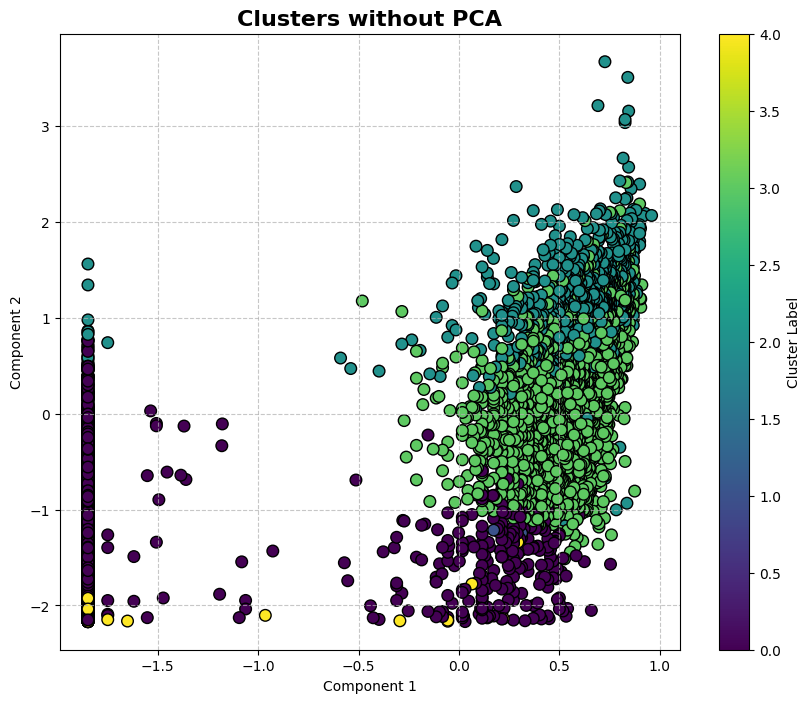

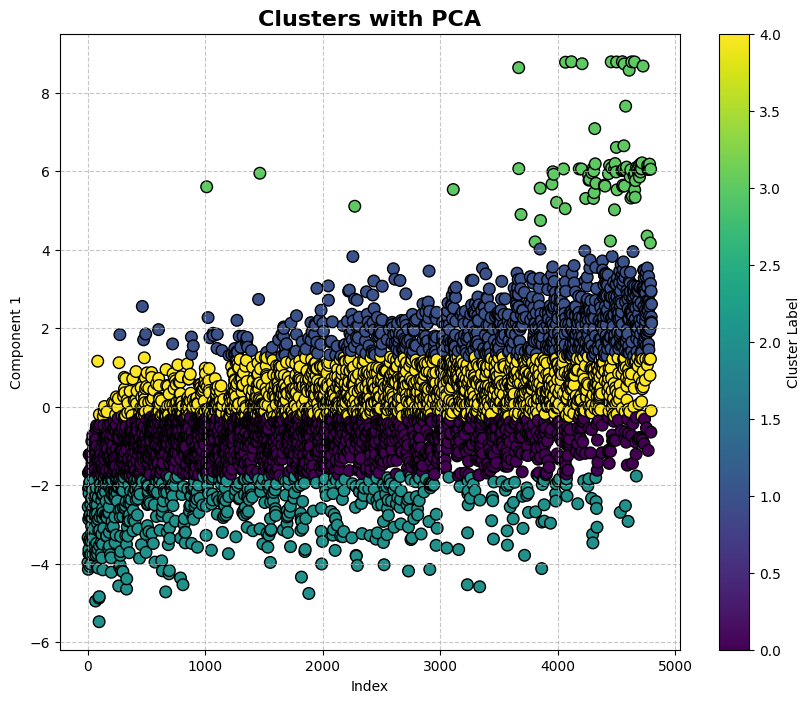

In [31]:
def run_kmeans(df, kmeans_params, optimal_clusters_no_pca, best_pca_params, random_state=42, n_jobs=-1):
    print("\nRunning KMeans with optimal parameters...")
    df_np = df.to_numpy()

    best_results = {
        'with_pca': {'model': None, 'labels': None, 'df': None, 'pca': None, 'score': -np.inf, 'params': None},
        'without_pca': {'model': None, 'labels': None, 'df': df_np, 'score': -np.inf, 'params': None}
    }

    def evaluate_kmeans(params, data):
        kmeans = KMeans(**params, random_state=random_state)
        labels = kmeans.fit_predict(data)
        silhouette = silhouette_score(data, labels)
        davies_bouldin = davies_bouldin_score(data, labels)
        calinski_harabasz = calinski_harabasz_score(data, labels)
        score = (silhouette - davies_bouldin + calinski_harabasz) / 3
        return score, kmeans, labels, params

    # Without PCA
    print("Evaluating KMeans without PCA...")
    kmeans_params_no_pca = {k: v for k, v in kmeans_params.items() if k != 'n_clusters'}
    kmeans_params_no_pca['n_clusters'] = [optimal_clusters_no_pca]

    results_no_pca = Parallel(n_jobs=n_jobs)(
        delayed(evaluate_kmeans)(params, df_np)
        for params in ParameterGrid(kmeans_params_no_pca)
    )

    best_result_no_pca = max(results_no_pca, key=lambda x: x[0])
    best_results['without_pca']['score'], best_results['without_pca']['model'], best_results['without_pca']['labels'], best_results['without_pca']['params'] = best_result_no_pca

    print(f"Best KMeans without PCA - Score: {best_results['without_pca']['score']:.4f}")
    print(f"Best Parameters for KMeans without PCA: {best_results['without_pca']['params']}")

    # With PCA
    print("Evaluating KMeans with PCA...")
    pca = PCA(n_components=best_pca_params['n_components'], svd_solver = best_pca_params['svd_solver'], whiten = best_pca_params['whiten'], random_state=random_state)
    df_pca = pca.fit_transform(df_np)

    kmeans_params_pca = {k: v for k, v in kmeans_params.items() if k != 'n_clusters'}
    kmeans_params_pca['n_clusters'] = [best_pca_params['n_clusters']]

    results_pca = Parallel(n_jobs=n_jobs)(
        delayed(evaluate_kmeans)(params, df_pca)
        for params in ParameterGrid(kmeans_params_pca)
    )

    best_result_pca = max(results_pca, key=lambda x: x[0])
    best_results['with_pca']['score'], best_results['with_pca']['model'], best_results['with_pca']['labels'], best_results['with_pca']['params'] = best_result_pca
    best_results['with_pca']['pca'] = pca
    best_results['with_pca']['df'] = df_pca

    # Determine overall best result
    overall_best_key = max(best_results, key=lambda x: best_results[x]['score'])
    overall_best_result = best_results[overall_best_key]


    print(f"Best KMeans with PCA - Score: {best_results['with_pca']['score']:.4f}")
    print(f"Best Parameters for KMeans with PCA: {best_results['with_pca']['params']}")
    print(f"Overall Best Result: KMeans {overall_best_key.replace('_', ' ')}")

    plot_clusters(df_np[:, :2], best_results['without_pca']['labels'], 'Clusters without PCA')
    plot_clusters(df_pca[:, :2], best_results['with_pca']['labels'], 'Clusters with PCA')

run_kmeans(
    df_preprocessed,
    unsupervised_param_grids["kmeans"],
    optimal_clusters_no_pca,
    best_pca_params,
    n_jobs=-1
)

Starting evaluation of DBSCAN with PCA and without PCA...
Evaluating DBSCAN without PCA...
Best DBSCAN without PCA - Silhouette: 0.7721, Davies-Bouldin: 0.4382, Calinski-Harabasz: 920.7032
Number of clusters: 2
Best Parameters for DBSCAN without PCA: {'algorithm': 'auto', 'eps': 3.1622776601683795, 'leaf_size': 10, 'metric': 'euclidean', 'min_samples': 2}


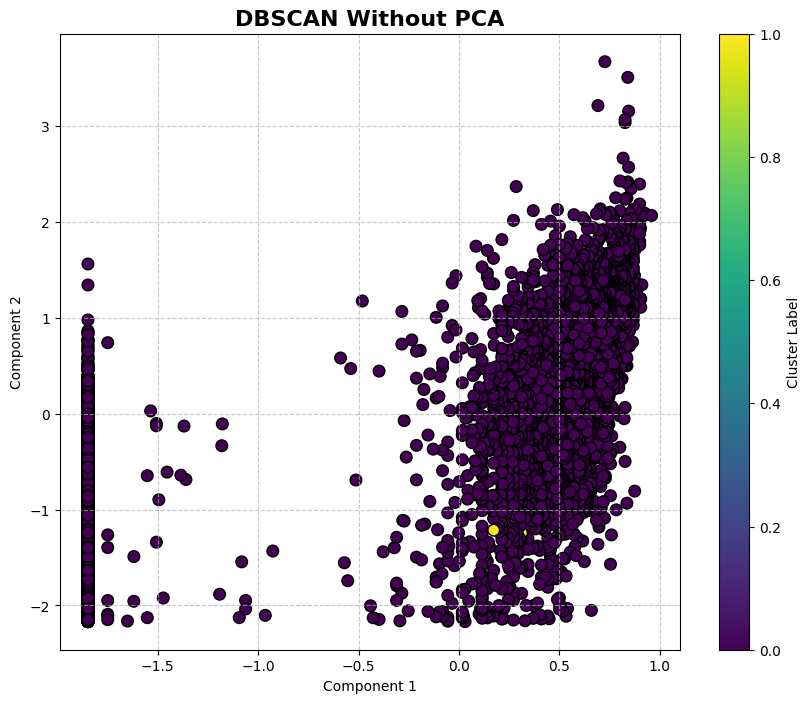

Evaluating DBSCAN with PCA...

Best DBSCAN with PCA - Silhouette: 0.8243, Davies-Bouldin: 0.2817, Calinski-Harabasz: 1684.4898
Number of clusters: 2
Best Number of PCA Components: 3
Best SVD Solver: auto
Best Whiten: True
Best Parameters for DBSCAN with PCA: {'algorithm': 'auto', 'eps': 3.1622776601683795, 'leaf_size': 10, 'metric': 'euclidean', 'min_samples': 2}


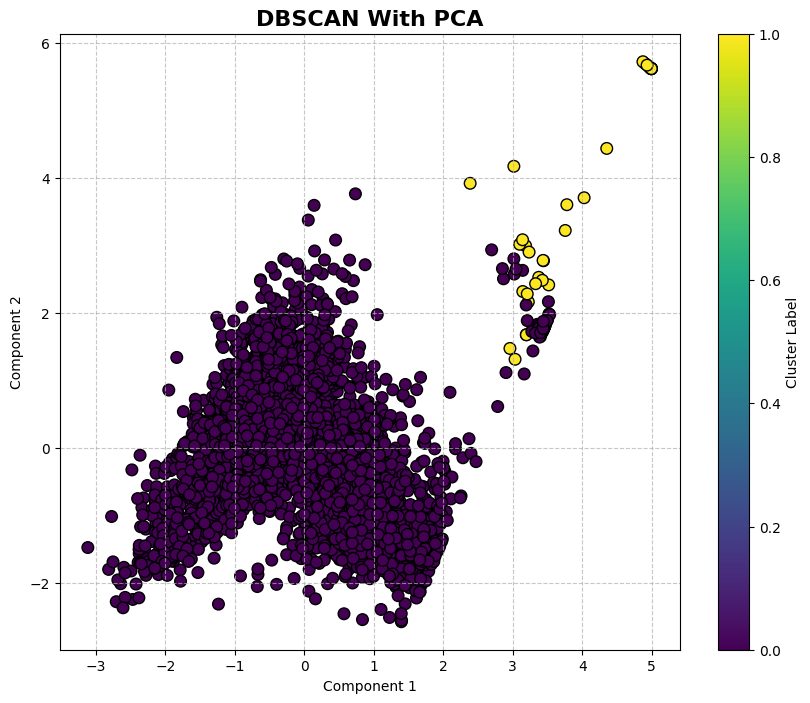


Best Overall Model: Best DBSCAN With PCA
Best Parameters: {'algorithm': 'auto', 'eps': 3.1622776601683795, 'leaf_size': 10, 'metric': 'euclidean', 'min_samples': 2}
Best Silhouette Score: 0.8243
Best Davies-Bouldin Index: 0.2817
Best Calinski-Harabasz Index: 1684.4898


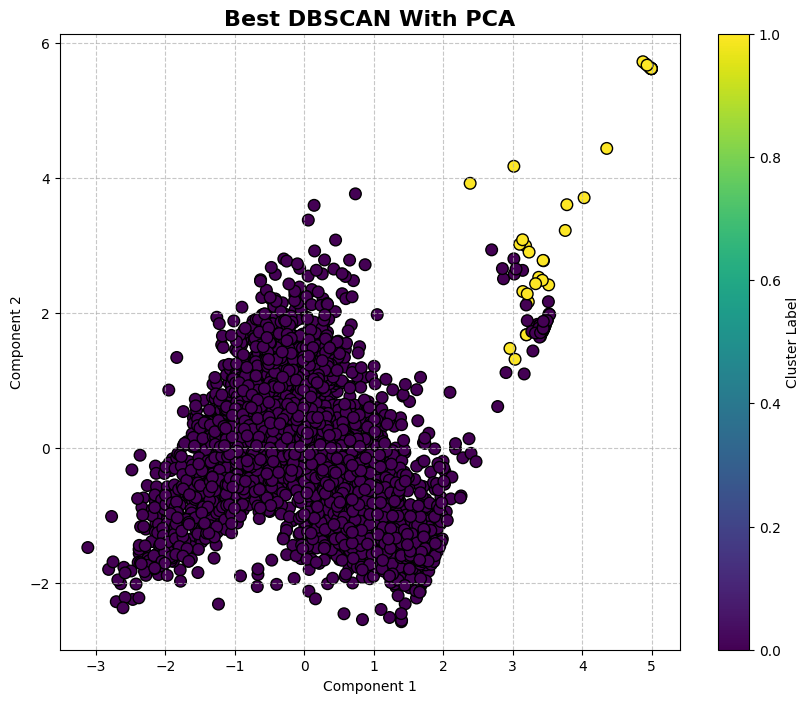


Finished DBSCAN evaluation in 3225.44 seconds.


In [32]:
def evaluate_dbscan(param_grid, pca_params, df, random_state=42, n_jobs=-1):
    print("Starting evaluation of DBSCAN with PCA and without PCA...")
    start_time = time.time()

    df_np = df.to_numpy()

    # Initialize variables for best results
    best_results = {
        'with_pca': {'pca': None, 'whiten': None, 'svd_solver': None, 'n_components': None, 'silhouette': -1, 'davies_bouldin': float('inf'), 'calinski_harabasz': -1, 'params': None, 'model': None, 'labels': None, 'df': None},
        'without_pca': {'silhouette': -1, 'davies_bouldin': float('inf'), 'calinski_harabasz': -1, 'params': None, 'model': None, 'labels': None}
    }

    def evaluate_single_model(params, data):
        model = DBSCAN(**params)
        labels = model.fit_predict(data)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        if n_clusters > 1:
            silhouette = silhouette_score(data, labels)
            davies_bouldin = davies_bouldin_score(data, labels)
            calinski_harabasz = calinski_harabasz_score(data, labels)
        else:
            silhouette = -1
            davies_bouldin = float('inf')
            calinski_harabasz = -1

        return silhouette, davies_bouldin, calinski_harabasz, model, labels, params, n_clusters 

    # Evaluate DBSCAN without PCA
    print("Evaluating DBSCAN without PCA...")
    param_combinations = list(ParameterGrid(param_grid))

    results_no_pca = Parallel(n_jobs=n_jobs)(
        delayed(evaluate_single_model)(params, df_np)
        for params in param_combinations
    )

    best_result_no_pca = max(results_no_pca, key=lambda x: x[0] - x[1] + x[2])
    best_results['without_pca']['silhouette'], best_results['without_pca']['davies_bouldin'], best_results['without_pca']['calinski_harabasz'], best_results['without_pca']['model'], best_results['without_pca']['labels'], best_results['without_pca']['params'], n_clusters_no_pca = best_result_no_pca

    print(f"Best DBSCAN without PCA - Silhouette: {best_results['without_pca']['silhouette']:.4f}, Davies-Bouldin: {best_results['without_pca']['davies_bouldin']:.4f}, Calinski-Harabasz: {best_results['without_pca']['calinski_harabasz']:.4f}")
    print(f"Number of clusters: {n_clusters_no_pca}")
    print(f"Best Parameters for DBSCAN without PCA: {best_results['without_pca']['params']}")
    plot_clusters(df_np, best_results['without_pca']['labels'], "DBSCAN Without PCA")

    # Evaluate DBSCAN with PCA
    print("Evaluating DBSCAN with PCA...")

    def evaluate_with_pca(n_components, svd_solver, whiten):
        pca = PCA(n_components=n_components, random_state=random_state, svd_solver=svd_solver, whiten=whiten)
        pca_data = pca.fit_transform(df_np)

        results_pca = [evaluate_single_model(params, pca_data) for params in param_combinations]
        best_result_pca = max(results_pca, key=lambda x: x[0] - x[1] + x[2])

        return (*best_result_pca, pca, n_components, svd_solver, whiten)

    results_pca = Parallel(n_jobs=n_jobs)(
        delayed(evaluate_with_pca)(n_components, svd_solver, whiten)
        for n_components in pca_params["n_components"]
        for svd_solver in pca_params["svd_solver"]
        for whiten in pca_params["whiten"]
    )

    best_result_pca = max(results_pca, key=lambda x: x[0] - x[1] + x[2])
    (best_results['with_pca']['silhouette'], best_results['with_pca']['davies_bouldin'], 
     best_results['with_pca']['calinski_harabasz'], best_results['with_pca']['model'], 
     best_results['with_pca']['labels'], best_results['with_pca']['params'], 
     best_results['with_pca']['n_clusters_pca'], best_results['with_pca']['pca'], 
     best_results['with_pca']['n_components'], best_results['with_pca']['svd_solver'], 
     best_results['with_pca']['whiten']) = best_result_pca

    print(f"\nBest DBSCAN with PCA - Silhouette: {best_results['with_pca']['silhouette']:.4f}, Davies-Bouldin: {best_results['with_pca']['davies_bouldin']:.4f}, Calinski-Harabasz: {best_results['with_pca']['calinski_harabasz']:.4f}")
    print(f"Number of clusters: {best_results['with_pca']['n_clusters_pca']}")
    print(f"Best Number of PCA Components: {best_results['with_pca']['n_components']}")
    print(f"Best SVD Solver: {best_results['with_pca']['svd_solver']}")
    print(f"Best Whiten: {best_results['with_pca']['whiten']}")
    print(f"Best Parameters for DBSCAN with PCA: {best_results['with_pca']['params']}")

    best_results['with_pca']['df'] = best_results['with_pca']['pca'].transform(df_np)
    plot_clusters(best_results['with_pca']['df'], best_results['with_pca']['labels'], "DBSCAN With PCA")

    # Determine the best overall model
    if best_results['with_pca']['silhouette'] > best_results['without_pca']['silhouette']:
        best_df = best_results['with_pca']['df']
        best_labels = best_results['with_pca']['labels']
        best_title = "Best DBSCAN With PCA"
        best_params = best_results['with_pca']['params']
        best_silhouette = best_results['with_pca']['silhouette']
        best_davies_bouldin = best_results['with_pca']['davies_bouldin']
        best_calinski_harabasz = best_results['with_pca']['calinski_harabasz']
    else:
        best_df = df_np
        best_labels = best_results['without_pca']['labels']
        best_title = "Best DBSCAN Without PCA"
        best_params = best_results['without_pca']['params']
        best_silhouette = best_results['without_pca']['silhouette']
        best_davies_bouldin = best_results['without_pca']['davies_bouldin']
        best_calinski_harabasz = best_results['without_pca']['calinski_harabasz']

    print(f"\nBest Overall Model: {best_title}")
    print(f"Best Parameters: {best_params}")
    print(f"Best Silhouette Score: {best_silhouette:.4f}")
    print(f"Best Davies-Bouldin Index: {best_davies_bouldin:.4f}")
    print(f"Best Calinski-Harabasz Index: {best_calinski_harabasz:.4f}")

    plot_clusters(best_df, best_labels, best_title)

    elapsed_time = time.time() - start_time
    print(f"\nFinished DBSCAN evaluation in {elapsed_time:.2f} seconds.")

evaluate_dbscan(unsupervised_param_grids["dbscan"], unsupervised_param_grids["pca"], df_preprocessed, n_jobs=-1)

In [33]:
from sklearn.metrics import pairwise_distances
from sklearn.utils import check_random_state
from joblib import Memory
from scipy.spatial.distance import cdist

Optimal number of clusters without PCA: 2
Gap Statistic without PCA: 1.3862


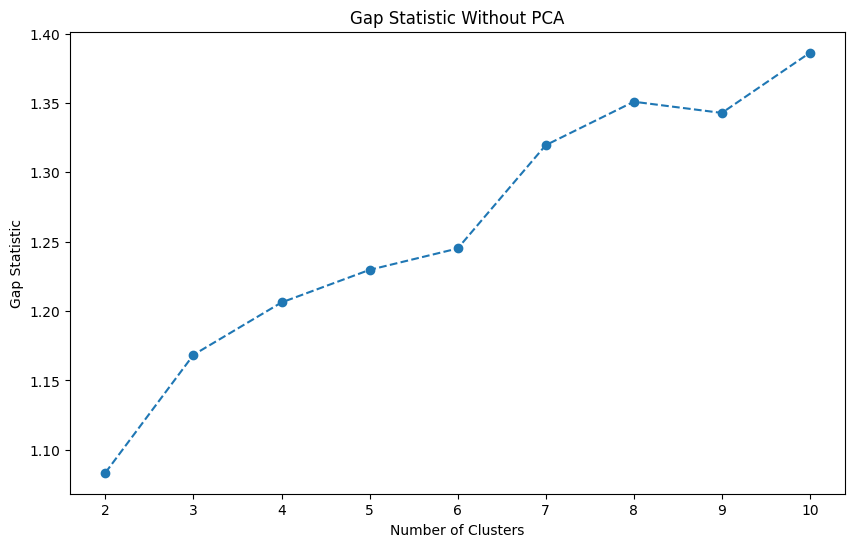

Optimal number of clusters with PCA: 3 using 3 PCA components
SVD Solver: arpack, Whiten: True
Gap Statistic with PCA: 1.3349


In [36]:
memory = Memory(location='.', verbose=0)

@memory.cache
def gap_statistic_single_k(k, data, n_refs, random_state):
    rng = check_random_state(random_state)
    
    # Use KMeans instead of AgglomerativeClustering for speed
    model = KMeans(n_clusters=k, random_state=random_state, n_init=1)
    labels = model.fit_predict(data)
    
    # Vectorized dispersion calculation
    centroids = np.array([np.mean(data[labels == i], axis=0) for i in range(k)])
    dispersion = np.sum(np.min(cdist(data, centroids, 'euclidean'), axis=1))
    
    # Generate reference datasets
    ref_dispersions = []
    for _ in range(n_refs):
        ref = rng.uniform(data.min(axis=0), data.max(axis=0), size=data.shape)
        ref_labels = KMeans(n_clusters=k, random_state=random_state, n_init=1).fit_predict(ref)
        ref_centroids = np.array([np.mean(ref[ref_labels == i], axis=0) for i in range(k)])
        ref_dispersion = np.sum(np.min(cdist(ref, ref_centroids, 'euclidean'), axis=1))
        ref_dispersions.append(ref_dispersion)
    
    gap = np.mean(np.log(ref_dispersions)) - np.log(dispersion)
    return gap

def gap_statistic(data, n_clusters_range, n_refs, random_state):
    return Parallel(n_jobs=-1)(
        delayed(gap_statistic_single_k)(k, data, n_refs, random_state) for k in n_clusters_range
    )

def find_optimal_clusters_with_kneed(gaps, n_clusters_range):
    kneedle = KneeLocator(n_clusters_range, gaps, curve='convex', direction='decreasing')
    return kneedle.elbow

def plot_gap_statistic(n_clusters_range, gaps, title):
    plt.figure(figsize=(10, 6))
    plt.plot(n_clusters_range, gaps, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Gap Statistic')
    plt.title(title)
    plt.show()

def compute_optimal_clusters_and_plot(df, n_clusters_range, pca_params, n_refs=10, random_state=42):
    best_no_pca = {'n_clusters': None, 'gap': -np.inf}
    best_with_pca = {'n_components': None, 'n_clusters': None, 'gap': -np.inf, 'svd_solver': None, 'whiten': None}

    # Without PCA
    gaps_no_pca = gap_statistic(df, n_clusters_range, n_refs=n_refs, random_state=random_state)
    optimal_clusters_no_pca = find_optimal_clusters_with_kneed(gaps_no_pca, n_clusters_range)
    best_no_pca['n_clusters'] = optimal_clusters_no_pca
    best_no_pca['gap'] = max(gaps_no_pca)
    
    print(f"Optimal number of clusters without PCA: {best_no_pca['n_clusters']}")
    print(f"Gap Statistic without PCA: {best_no_pca['gap']:.4f}")
    
    plot_gap_statistic(n_clusters_range, gaps_no_pca, 'Gap Statistic Without PCA')

    # With PCA
    pca_results = Parallel(n_jobs=-1)(
        delayed(lambda nc, ss, w: (
            nc, ss, w,
            PCA(n_components=nc, svd_solver=ss, whiten=w, random_state=random_state).fit_transform(df)
        ))(n_components, svd_solver, whiten)
        for n_components in pca_params["n_components"]
        for svd_solver in pca_params["svd_solver"]
        for whiten in pca_params["whiten"]
    )

    for n_components, svd_solver, whiten, df_pca in pca_results:
        gaps_pca = gap_statistic(df_pca, n_clusters_range, n_refs=n_refs, random_state=random_state)
        optimal_clusters_with_pca = find_optimal_clusters_with_kneed(gaps_pca, n_clusters_range)
        
        if max(gaps_pca) > best_with_pca['gap']:
            best_with_pca['n_components'] = n_components
            best_with_pca['n_clusters'] = optimal_clusters_with_pca
            best_with_pca['gap'] = max(gaps_pca)
            best_with_pca['svd_solver'] = svd_solver
            best_with_pca['whiten'] = whiten

    print(f"Optimal number of clusters with PCA: {best_with_pca['n_clusters']} using {best_with_pca['n_components']} PCA components")
    print(f"SVD Solver: {best_with_pca['svd_solver']}, Whiten: {best_with_pca['whiten']}")
    print(f"Gap Statistic with PCA: {best_with_pca['gap']:.4f}")

    return best_no_pca, best_with_pca


best_no_pca, best_with_pca = compute_optimal_clusters_and_plot(df_preprocessed, unsupervised_param_grids["hierarchicalclustering"]["n_clusters"], 
unsupervised_param_grids["pca"])

Evaluating Hierarchical Clustering with and without PCA...

Evaluating Hierarchical Clustering without PCA...
Best params without PCA: {'n_clusters': 2, 'metric': 'cosine', 'linkage': 'average', 'distance_threshold': None, 'compute_full_tree': True}
Best score without PCA: 604.0239
Silhouette Score: 0.4124
Davies-Bouldin Index: 1.1467
Calinski-Harabasz Index: 1812.8058


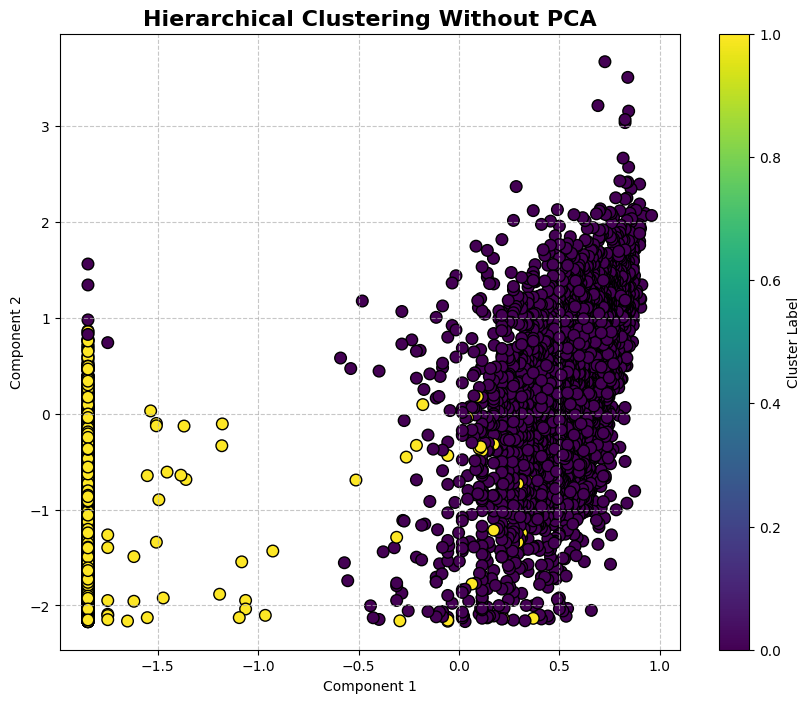


Evaluating Hierarchical Clustering with PCA...

Best overall results:
PCA components: 3
Best parameters: {'n_clusters': 3, 'metric': 'euclidean', 'linkage': 'ward', 'distance_threshold': None, 'compute_full_tree': True}
Best score: 927.9909
Silhouette Score: 0.3932
Davies-Bouldin Index: 0.8777
Calinski-Harabasz Index: 2784.4572


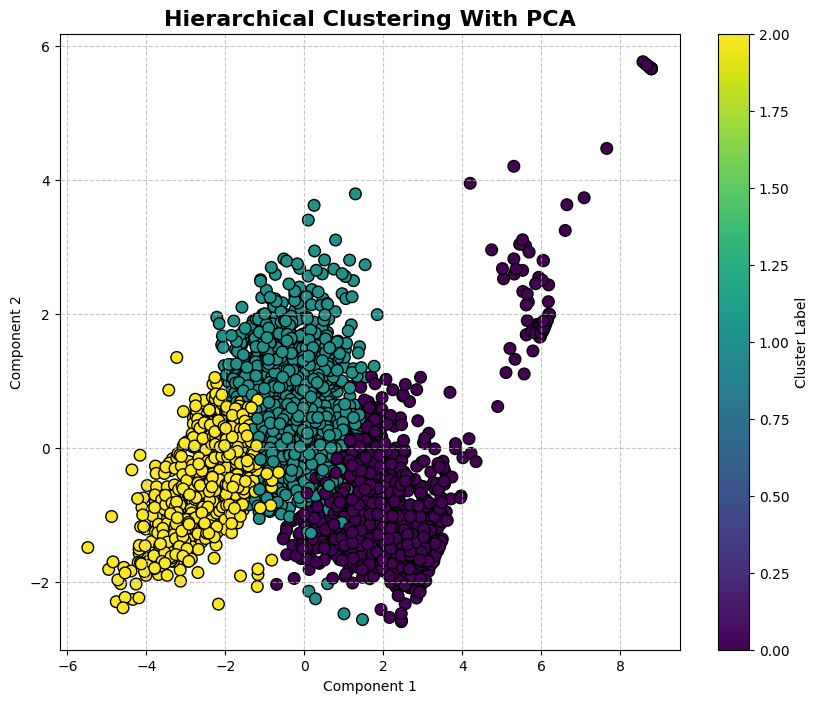


Finished evaluating Hierarchical Clustering in 560.65 seconds.


In [37]:
def evaluate_hierarchical(param_grid, df, best_no_pca, best_with_pca, n_jobs=-1, random_state=42):
    print("Evaluating Hierarchical Clustering with and without PCA...")
    start_time = time.time()

    df_np = df.to_numpy()

    results = []

    def evaluate_model(model, data):
        labels = model.fit_predict(data)
        silhouette = silhouette_score(data, labels)
        davies_bouldin = davies_bouldin_score(data, labels)
        calinski_harabasz = calinski_harabasz_score(data, labels)
        score = (silhouette - davies_bouldin + calinski_harabasz) / 3
        return score, silhouette, davies_bouldin, calinski_harabasz, labels

    def evaluate_model_params(params, data):
        if 'n_clusters' in params:
            params['distance_threshold'] = None
        elif 'distance_threshold' in params:
            params['n_clusters'] = None
        if params.get('linkage') == 'ward':
            params['metric'] = 'euclidean'
        model = AgglomerativeClustering(**params)
        score, silhouette, davies_bouldin, calinski_harabasz, labels = evaluate_model(model, data)
        return score, silhouette, davies_bouldin, calinski_harabasz, labels, model, params

    # Generate all parameter combinations
    param_combinations = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

    # Evaluate without PCA
    print("\nEvaluating Hierarchical Clustering without PCA...")
    param_combinations_no_pca = [dict(params, n_clusters=best_no_pca['n_clusters']) for params in param_combinations]

    results_no_pca = Parallel(n_jobs=n_jobs)(
        delayed(evaluate_model_params)(params, df_np)
        for params in param_combinations_no_pca
    )

    best_result_no_pca = max(results_no_pca, key=lambda x: x[0])
    score, silhouette, davies_bouldin, calinski_harabasz, labels, best_model_no_pca, best_params_no_pca = best_result_no_pca

    print(f"Best params without PCA: {best_params_no_pca}")
    print(f"Best score without PCA: {score:.4f}")
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")

    # Plot results for Hierarchical Clustering without PCA
    plot_clusters(df_np, labels, "Hierarchical Clustering Without PCA")

    # Evaluate with PCA
    print("\nEvaluating Hierarchical Clustering with PCA...")
    pca = PCA(n_components=best_with_pca['n_components'], svd_solver=best_with_pca['svd_solver'], random_state=random_state)
    df_pca = pca.fit_transform(df_np)

    param_combinations_pca = [dict(params, n_clusters=best_with_pca['n_clusters']) for params in param_combinations]

    results_pca = Parallel(n_jobs=n_jobs)(
        delayed(evaluate_model_params)(params, df_pca)
        for params in param_combinations_pca
    )

    best_result_pca = max(results_pca, key=lambda x: x[0])
    score, silhouette, davies_bouldin, calinski_harabasz, labels, best_model, best_params_pca = best_result_pca

    print(f"\nBest overall results:")
    print(f"PCA components: {best_with_pca['n_components']}")
    print(f"Best parameters: {best_params_pca}")
    print(f"Best score: {score:.4f}")
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f}")

    # Plot results for best Hierarchical Clustering
    plot_clusters(df_pca, labels, "Hierarchical Clustering With PCA")

    elapsed_time = time.time() - start_time
    print(f"\nFinished evaluating Hierarchical Clustering in {elapsed_time:.2f} seconds.")


# Usage
evaluate_hierarchical(
    unsupervised_param_grids["hierarchicalclustering"],
    df_preprocessed,
    best_no_pca,
    best_with_pca,
    n_jobs=-1
)